<center><b><h1>Data Mining Term Project Fall 2020</h1></bold></center>

>Name: Asodariya, Krupa Rameshbhai<br>
>UTA ID: 1001773036

> <h4>Goal of Term project:<br></h4>
The goal of the term project is building a classifier that you can show to someone with your
homepage that will help you look competent. Additionally, build a web application to present a demo with rating for that given user input text(review) using working of model. Moreover,Make improvements over the different model you are using to clssiy the object.<br><br>


><h2>Overview of notebook:</h2>

1. I have used Board game geek dataset from kaggle:<br>
     Link: https://www.kaggle.com/jvanelteren/boardgamegeek-reviews<br>

2. This dataset has 15million rows which is quite large dataset for the system that we use, Therefor I have used only 10% of the total data for this project.<br>

3. Data preprocessing:<br>
    Dara preprocessing is most important task in text analysis and it will affect your model's performance and final result. Generally, in this step we remove emojis, stop words, some rare occurring words from text.<br>

4. Models for data training and testing:<br>
    There are so many models for text classification, bernoulli Naive Bayes, linear Support vector machine,multinomial Naive Bayes, etc.I have used some of those models in order to get the best accuracy on the dataset I am using.<br>

5. Data visualization:<br>
   I used matplotlib, seaborn libraries for data visualization. data is represnted by scatter plot, heatmap and line graph with appropriate labels on axis and legends.

6.   Performance evaluation of algorithms:<br>
    for evaluation purpose i used confusion matrix, F1 score and classification report etc.<br>
   



><b><h1>Classifiers used in the project</h1></b>

><h4>1) Bernoulli NB classifier</h4><br>

The assumption in this model is that the features binary (0s and 1s) in nature. An application of Bernoulli Naïve Bayes classification is Text classification with ‘bag of words’ model. The Scikit-learn provides sklearn.naive_bayes.BernoulliNB to implement the Gaussian Naïve Bayes algorithm for classification.<br>
In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies. If ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e87000dd6142b81d041896a30fe58f0c3acb2158) is a boolean expressing the occurrence or absence of the i'th term from the vocabulary, then the likelihood of a document given a class ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1a0887b56787ba96e79de2b9f5c6ff30aabad1c6)is given by<br>
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b23b8affe1fa31b1ce499d5d2944d9763ff2e6e)

where ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8e043cc1fad255f27aa1376296db9d1436f0c9c8) is the probability of class ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1a0887b56787ba96e79de2b9f5c6ff30aabad1c6) generating the term ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e87000dd6142b81d041896a30fe58f0c3acb2158). This event model is especially popular for classifying short texts. It has the benefit of explicitly modelling the absence of terms. Note that a naive Bayes classifier with a Bernoulli event model is not the same as a multinomial NB classifier with frequency counts truncated to one.

><h4>2) Multinomial Naive Bayes</h4><br>

This is basic logic behind naive bayes. It is all about conditional dependency.The term Multinomial Naive Bayes simply lets us know that each p(fi|c) is a multinomial distribution, rather than some other distribution. This works well for data which can easily be turned into counts, such as word counts in text.<br> 
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/0bf7b8e6edae7359863977eca136558ce5b68568)

The multinomial naïve Bayes classifier becomes a linear classifier when expressed in log-space:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e53303c0644c3d64e5eb86210023e76198285e0c)


><h4>2)Linear Support Vactore Classification</h4><br>

SVM is a supervised machine learning algorithm which can be used for classification or regression problems.Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. SVM has one argument named "kernel", which specifies, the hyperplane shape which separates labels. I am using Linear shape for kernel value.<br>
![alt text](https://66.media.tumblr.com/ff709fe1c77091952fb3e3e6af91e302/tumblr_inline_o9aa8dYRkB1u37g00_540.png)

We are given a training dataset of n points of the form ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/3851f21b1d94ed988a19e869b7993ae18296837c)
where the Yi are either 1 or −1, each indicating the class to which the point Xi belongs. Each Xi is a p-dimensional real vector. We want to find the "maximum-margin hyperplane" that divides the group of points Xi for which Yi=1 from the group of points for which Yi=-1, which is defined so that the distance between the hyperplane and the nearest point Xi from either group is maximized.<br>

Any hyperplane can be written as the set of points X  satisfying![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e993685e0006cfaac206a9c5f9ee7225e0bdeee1)
where W  is the (not necessarily normalized) normal vector to the hyperplane. This is much like Hesse normal form, except that W  is not necessarily a unit vector. The parameter ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/905afdc8c606dc1629d3145153f18b30f8d1cead) determines the offset of the hyperplane from the origin along the normal vector W .


<h1><strong>Import requirement for this project</strong></h1>

In [45]:
import pathlib
import os
import re
import pandas as pd
import numpy as np
import random
import collections
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB, BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,classification_report, confusion_matrix
from sklearn.svm import LinearSVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Krupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


><b><h3>Read the dataset</h3></b><br>
>here I used the read_csv() method of pandas to read the bgg-15m-reviews.csv file data.

In [46]:
df = pd.read_csv("../../downloads/archive/bgg-15m-reviews.csv") 

print(df.head())
print(len(df))

   Unnamed: 0             user  rating  \
0           0          Torsten    10.0   
1           1  mitnachtKAUBO-I    10.0   
2           2           avlawn    10.0   
3           3       Mike Mayer    10.0   
4           4          Mease19    10.0   

                                             comment     ID      name  
0                                                NaN  30549  Pandemic  
1  Hands down my favorite new game of BGG CON 200...  30549  Pandemic  
2  I tend to either love or easily tire of co-op ...  30549  Pandemic  
3                                                NaN  30549  Pandemic  
4  This is an amazing co-op game.  I play mostly ...  30549  Pandemic  
15823269


><b><h3>Drop null comment records</h3></b><br>
>here I remove all the records which contains null in comment field cause they are no longer helpful to decide the rating for that review.

In [47]:
df1 = df.dropna()
print(len(df1))
df1.head()


2995023


,Unnamed: 0,user,rating,comment,ID,name
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
5,5,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
8,8,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic


In [49]:
count=df1['name'].value_counts()[:50]
print(count)

Carcassonne                             15472
Catan                                   15388
Pandemic                                13482
7 Wonders                               11367
Dominion                                11334
Agricola                                10780
Ticket to Ride                          10715
Puerto Rico                             10261
Citadels                                 8820
Power Grid                               8796
Race for the Galaxy                      7986
Small World                              7970
King of Tokyo                            7896
Lost Cities                              7598
Love Letter                              7542
Arkham Horror                            7313
Ticket to Ride: Europe                   7247
Terraforming Mars                        7195
Bohnanza                                 7124
Codenames                                7017
Twilight Struggle                        6871
Splendor                          

In [50]:
data=df1[["comment","rating"]]
print(type(data))
print(data.head())


<class 'pandas.core.frame.DataFrame'>
                                             comment  rating
1  Hands down my favorite new game of BGG CON 200...    10.0
2  I tend to either love or easily tire of co-op ...    10.0
4  This is an amazing co-op game.  I play mostly ...    10.0
5  Hey! I can finally rate this game I've been pl...    10.0
8  Love it- great fun with my son. 2 plays so far...    10.0


>Here, first I have done the shuffling of the whole data set, then I used only 10% of the whole data by considering the limitation of system processor. Here I have assigned the reviews to the cont variable and rating to val variable.

In [113]:
# shuffling the data set
print(type(data))
shuffle = data.sample(frac=1)
size = int(0.10*(len(data)+1))
data = shuffle[:size]
print(len(data))
print(data.head())
print(type(data))
cont = data.iloc[:,0].values
val = data.iloc[:,1].values

<class 'pandas.core.frame.DataFrame'>
2995
                                                    comment  rating
4348669     reminds aoe would definitely like buy available     8.0
12618505  well say game looks awesome kind awesome perso...     7.0
6254433                   quite ages scratches similar itch     6.0
15386264  played tonight group seven plenty good fun def...     8.0
14781575  unique mechanic world baseball games worth lea...     6.0
<class 'pandas.core.frame.DataFrame'>


><b><h3>Data Preprocessing</h3></b><br>
Here, I have removed all the single letter word and signs and all the (, . " ; ? ')etc. Also, I have convert all text in to lowercase. and assign that clean text to the cont again.

In [114]:
def preprocessing_of_data(text):
    text = re.sub(re.compile('<.*?>'), '', text) 
    text = re.sub('[^a-zA-Z]', ' ', text)
    text=re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
    text = text.lower() 
    return text

for i in range(len(cont)):
    cont[i] = preprocessing_of_data(cont[i])
cont[2]

'quite ages scratches similar itch'

In [115]:
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,comment,rating
4348669,reminds aoe would definitely like buy available,8.0
12618505,well say game looks awesome kind awesome perso...,7.0
6254433,quite ages scratches similar itch,6.0
15386264,played tonight group seven plenty good fun def...,8.0
14781575,unique mechanic world baseball games worth lea...,6.0


><b><h3>Removal of Stop words</h3></b><br>
>To remove stop words, I tokenized those comments using tokenizer tool provided by Natural Language toolkit (NLTK), and then removed those stop words. In nltk, there is one class "corpus" which contains list of these stop words. Along with them, comments are also converted into lower alphabets using lower() function.

In [116]:
data["comment"] = data.apply(lambda row: word_tokenize(row["comment"]), axis=1)
data.head()

C:\Users\Krupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment,rating
4348669,"[reminds, aoe, would, definitely, like, buy, a...",8.0
12618505,"[well, say, game, looks, awesome, kind, awesom...",7.0
6254433,"[quite, ages, scratches, similar, itch]",6.0
15386264,"[played, tonight, group, seven, plenty, good, ...",8.0
14781575,"[unique, mechanic, world, baseball, games, wor...",6.0


In [117]:
stop = set(stopwords.words('english'))
data['comment'] = data['comment'].apply(lambda x: [word for word in x if word not in stop])
data['comment'] = data['comment'].apply(' '.join)
print(data.head())

                                                    comment  rating
4348669     reminds aoe would definitely like buy available     8.0
12618505  well say game looks awesome kind awesome perso...     7.0
6254433                   quite ages scratches similar itch     6.0
15386264  played tonight group seven plenty good fun def...     8.0
14781575  unique mechanic world baseball games worth lea...     6.0


C:\Users\Krupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Krupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
data.head()

,comment,rating
4348669,reminds aoe would definitely like buy available,8.0
12618505,well say game looks awesome kind awesome perso...,7.0
6254433,quite ages scratches similar itch,6.0
15386264,played tonight group seven plenty good fun def...,8.0
14781575,unique mechanic world baseball games worth lea...,6.0


>Here, I round up the rating given into the dataset to get the as much as accurate result for the user entered the review.

In [119]:
data['rating']=np.round(data['rating'])
data.head()

C:\Users\Krupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment,rating
4348669,reminds aoe would definitely like buy available,8.0
12618505,well say game looks awesome kind awesome perso...,7.0
6254433,quite ages scratches similar itch,6.0
15386264,played tonight group seven plenty good fun def...,8.0
14781575,unique mechanic world baseball games worth lea...,6.0


><b><h2>Splitting the data</h2></b><br>
>here I split the data in to the train set and text set.

In [120]:
#splitting dataset in to four parts randomly
X_train, X_test, Y_train, Y_test = train_test_split(data['comment'],data['rating'], test_size=0.3) # 70% training and 30% test

In [121]:
print(len(X_train))

2096


In [122]:
print(len(Y_test))

899


><b><h2>Vectorizer the dataset</h2></b><br>
>This CountVectorizer() Convert a collection of text documents to a matrix of token counts.This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.<br>
>This are the method I used :<br> 1)fit_transform(raw_documents, y=None) *Learn the vocabulary dictionary and return document-term matrix.This is equivalent to fit followed by transform, but more efficiently implemented.<br>2) transform(raw_documents)  *Transform documents to document-term matrix.Extract token counts out of raw text documents using the vocabulary fitted with fit or the one provided to the constructor.<br><br>
<br>
><b><h4>Vectorizer the dataset with tf idf</h4></b><br>
>This TfidfVectorizer() Convert a collection of raw documents to a matrix of TF-IDF features.<br>
>This are the method I used : <br> 1)fit_transform(raw_documents, y=None)  *Learn vocabulary and idf, return document-term matrix.This is equivalent to fit followed by transform, but more efficiently implemented.<br> 2) transform(raw_documents, copy='deprecated')  *Transform documents to document-term matrix.Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).

In [123]:
vectorizer = CountVectorizer()
Xfit = vectorizer.fit_transform(X_train)
Xtransform = vectorizer.transform(X_test)
tfidfvect=TfidfVectorizer()
Xfit_tfidf=tfidfvect.fit_transform(X_train)
Xtransform_tfidf=tfidfvect.transform(X_test)

><h1><b>Different Classifiers</b></h1><br>

><h2><b>1)Bernoulli Naive Bayes</b></h2><br>
>Naive Bayes classifier for multivariate Bernoulli models.Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
>This methods I used from bernoulli classifier :<br>1)fit(X, y, sample_weight=None)  *Fit Naive Bayes classifier according to X, y <br>2)predict(X)  *Perform classification on an array of test vectors X.

In [124]:
nb=BernoulliNB()
nb.fit(Xfit,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [125]:
pred=nb.predict(Xtransform)

><b><h2>Accuracy Score</h2></b><br>
>This sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None) Perform classification on an array of test vectors X.

><b><h2>f1 Score</h2></b><br>
>This sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn') Compute the F1 score, also known as balanced F-score or F-measure.<br>
>The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: <br>
>F1 = 2 * (precision * recall) / (precision + recall)

In [126]:
nb_acc=accuracy_score(Y_test,pred)
nb_f1=f1_score(Y_test,pred,average='micro')
print("Accuracy: {:.3f}".format(nb_acc))
print("F1 Score: {:.5f}".format(nb_f1))

Accuracy: 0.276
F1 Score: 0.27586


>This is the line chart which represent the first 10 actual rating vs first 10 predicted rating.

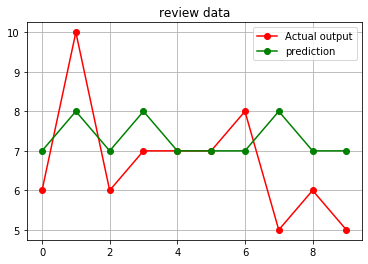

In [127]:
import matplotlib.pyplot as plt
plt.plot(Y_test[:10].values, label='Actual output',color='red',marker='o')
plt.plot(pred[:10], label='prediction',color='green',marker='o')
plt.title('review data')
plt.grid(True)
plt.legend()
plt.show()

><b><h3>confusion matrix</h3></b>

In [128]:
cm = confusion_matrix(Y_test,pred)
print(cm)

[[  0   0   0   0   0   1   5   7   0   0]
 [  0   0   0   1   0   2   1   5   0   0]
 [  0   0   0   1   0   8   8   8   0   0]
 [  0   0   0   0   0  11  17  20   0   0]
 [  0   0   0   1   0   6  27  42   0   0]
 [  0   0   0   0   0  13  64  97   1   0]
 [  0   0   0   1   1  10  71 107   3   0]
 [  0   0   0   2   0  13  51 163   1   0]
 [  0   0   0   0   0   2  23  60   1   0]
 [  0   0   0   1   0   1   6  36   0   0]]


><b><h3>Heat Map for confusion matrix</h3></b>
>A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to extract specific data point. It is quite straight forward to make a heat map, as shown on the examples below.

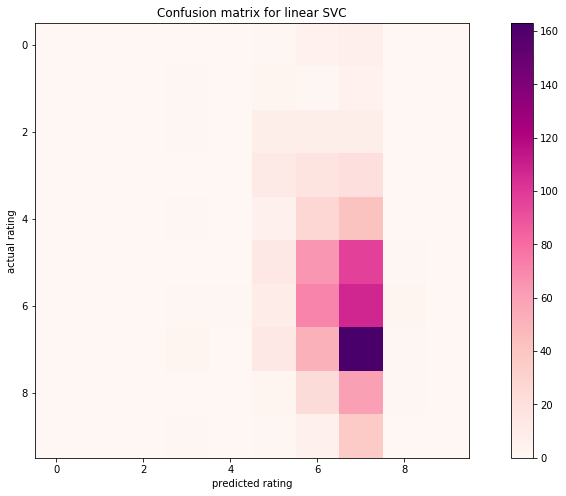

In [129]:

plt.figure(figsize=(15,8))
# ax = sb.heatmap(cm2, linewidth=0.5)
plt.imshow(cm, cmap='RdPu', interpolation='nearest')
plt.title("Confusion matrix for linear SVC")
plt.ylabel("actual rating")
plt.xlabel("predicted rating")
plt.colorbar()
plt.show()

><b><h3>Classification report</h3></b><br>
> this sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn') funtion is used for classifictaion report.<br>
>Build a text report showing the main classification metrics.

In [130]:
cr = classification_report(Y_test, pred)
print("Classification Report for Bernoulli Naive Bayes")
print(cr)

Classification Report for Bernoulli Naive Bayes
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00        48
         5.0       0.00      0.00      0.00        76
         6.0       0.19      0.07      0.11       175
         7.0       0.26      0.37      0.30       193
         8.0       0.30      0.71      0.42       230
         9.0       0.17      0.01      0.02        86
        10.0       0.00      0.00      0.00        44

    accuracy                           0.28       899
   macro avg       0.09      0.12      0.09       899
weighted avg       0.19      0.28      0.20       899



C:\Users\Krupa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


><b><h2>Multinomial Naive Bayes calssifier</h2></b><br>
> this class sklearn.naive_bayes.MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None) function used for Multinomial Naive Bayes.<br>
>Naive Bayes classifier for multinomial models<br>
>The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [131]:
mnb=MultinomialNB(alpha=0.001)
mnb.fit(Xfit,Y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [132]:
pred1=mnb.predict(Xtransform)

In [133]:
mnb_acc=accuracy_score(Y_test,pred1)
mnb_f1=f1_score(Y_test,pred1,average='micro')
print("Accuracy: {:.3f}".format(mnb_acc))
print("F1 Score: {:.5f}".format(mnb_f1))

Accuracy: 0.242
F1 Score: 0.24249


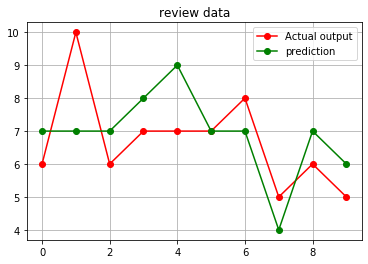

In [134]:
# import matplotlib.pyplot as plt

# x = [0,1,2,3,4,5,6,7,8,9]
# plt.scatter(x,Y_test[:10].values, color='red', alpha=0.5)
# plt.scatter(x,pred1[:10], color='green', alpha=0.5)
# plt.show()

import matplotlib.pyplot as plt
plt.plot(Y_test[:10].values, label='Actual output',color='red',marker='o')
plt.plot(pred1[:10], label='prediction',color='green',marker='o')
plt.title('review data')
plt.grid(True)
plt.legend()
plt.show()

In [135]:
cm1 = confusion_matrix(Y_test,pred1)
print(cm1)

[[  0   0   1   1   0   2   4   4   1   0]
 [  0   0   0   1   1   6   0   1   0   0]
 [  1   0   0   2   0   9   9   3   0   1]
 [  0   0   2   2   4   9  17  10   3   1]
 [  0   1   0   2   6  22  18  23   2   2]
 [  0   1   2   5   9  43  46  59   5   5]
 [  0   0   2   3   8  46  53  59  13   9]
 [  0   0   1   2  10  42  43 105  18   9]
 [  0   0   0   2   4  21  23  25   6   5]
 [  0   0   1   0   1   7  11  15   6   3]]


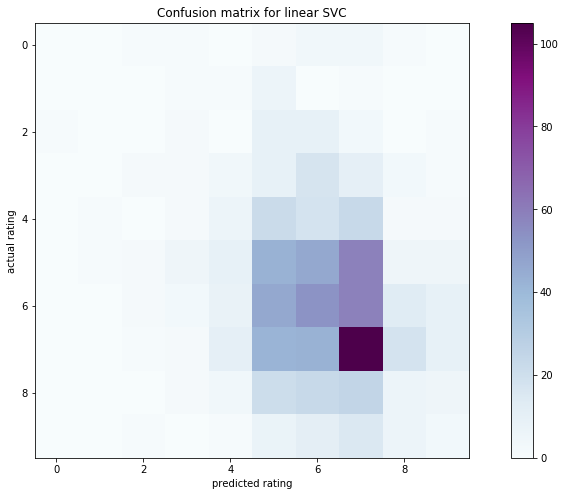

In [136]:

plt.figure(figsize=(15,8))
# ax = sb.heatmap(cm2, linewidth=0.5)
plt.imshow(cm1, cmap='BuPu', interpolation='nearest')
plt.title("Confusion matrix for linear SVC")
plt.ylabel("actual rating")
plt.xlabel("predicted rating")
plt.colorbar()
plt.show()

In [137]:
cr1 = classification_report(Y_test, pred1)
print("Classification Report for Multinomial Naive Bayes")
print(cr1)

Classification Report for Multinomial Naive Bayes
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00        25
         4.0       0.10      0.04      0.06        48
         5.0       0.14      0.08      0.10        76
         6.0       0.21      0.25      0.23       175
         7.0       0.24      0.27      0.25       193
         8.0       0.35      0.46      0.39       230
         9.0       0.11      0.07      0.09        86
        10.0       0.09      0.07      0.08        44

    accuracy                           0.24       899
   macro avg       0.12      0.12      0.12       899
weighted avg       0.21      0.24      0.22       899



><b><h2>Grid search</h2></b><br>
> This function class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False) is used for the grid search.<br><br>
>Exhaustive search over specified parameter values for an estimator. Important members are fit, predict. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

>This is the method I used to get the best score and best parameter : <br> fit(X, y=None, *, groups=None, **fit_params) : Run fit with all sets of parameters.


In [78]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.01,0.1,0.5,1,10]}
mnb_grid_search=GridSearchCV(MultinomialNB(), param_grid=param, n_jobs=-1, cv=5)
mnb_grid_search.fit(Xfit,Y_train)

print("best accuracy : %.5f"%mnb_grid_search.best_score_)
print("best parameter: ", mnb_grid_search.best_params_)

C:\Users\Krupa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


best accuracy : 0.30042
best parameter:  {'alpha': 1}


><b><h2>Multinomial Naive bayes with tf idf</h2></b> 

In [139]:
mnbtf=MultinomialNB(alpha=0.001)
mnbtf.fit(Xfit_tfidf,Y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [140]:
predtf=mnbtf.predict(Xtransform_tfidf)

In [141]:
mnb_acc_tfidf=accuracy_score(Y_test,predtf)
mnb_f1_tfidf=f1_score(Y_test,predtf,average='micro')
print("Accuracy: {:.3f}".format(mnb_acc_tfidf))
print("F1 Score: {:.5f}".format(mnb_f1_tfidf))

Accuracy: 0.244
F1 Score: 0.24360


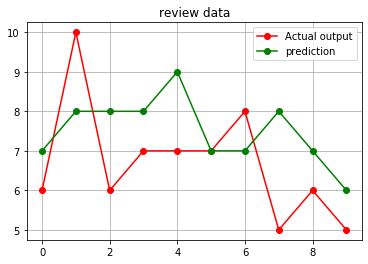

In [142]:
import matplotlib.pyplot as plt
plt.plot(Y_test[:10].values, label='Actual output',color='red',marker='o')
plt.plot(predtf[:10], label='prediction',color='green',marker='o')
plt.title('review data')
plt.grid(True)
plt.legend()
plt.show()

In [143]:
cmtf = confusion_matrix(Y_test,predtf)
print(cmtf)

[[  0   0   1   1   0   3   4   4   0   0]
 [  0   0   0   0   1   7   0   1   0   0]
 [  0   0   0   2   0   8  11   4   0   0]
 [  0   0   0   0   3  15  19   9   2   0]
 [  0   0   0   1   4  22  17  30   2   0]
 [  0   0   1   5   7  42  47  64   4   5]
 [  0   0   1   3   8  45  46  71  13   6]
 [  0   0   0   3   7  41  40 120  14   5]
 [  0   0   0   0   2  22  25  31   4   2]
 [  0   0   1   0   0   8   8  19   5   3]]


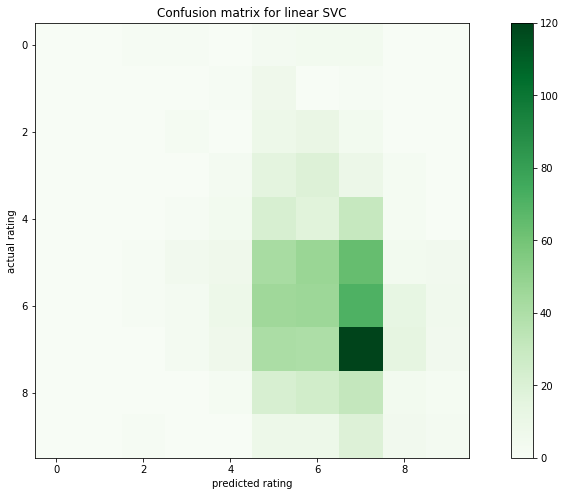

In [144]:

plt.figure(figsize=(15,8))
# ax = sb.heatmap(cm2, linewidth=0.5)
plt.imshow(cmtf, cmap='Greens', interpolation='nearest')
plt.title("Confusion matrix for linear SVC")
plt.ylabel("actual rating")
plt.xlabel("predicted rating")
plt.colorbar()
plt.show()

In [145]:
cr3 = classification_report(Y_test, predtf)
print("Classification Report for Multinomial with tfidf")
print(cr3)

Classification Report for Multinomial with tfidf
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00        48
         5.0       0.12      0.05      0.07        76
         6.0       0.20      0.24      0.22       175
         7.0       0.21      0.24      0.22       193
         8.0       0.34      0.52      0.41       230
         9.0       0.09      0.05      0.06        86
        10.0       0.14      0.07      0.09        44

    accuracy                           0.24       899
   macro avg       0.11      0.12      0.11       899
weighted avg       0.20      0.24      0.21       899



C:\Users\Krupa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


><b><h2>linear Support vector classification</h2></b><br>
>This function class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000) is used for linear svc.<br>
> Linear Support Vector Classification. Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [146]:
lsvc=LinearSVC()
lsvc.fit(Xfit,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [147]:
pred2=lsvc.predict(Xtransform)

In [148]:
lsvc_acc=accuracy_score(Y_test,pred2)
lsvc_f1=f1_score(Y_test,pred2,average='micro')
print("Accuracy: {:.3f}".format(lsvc_acc))
print("F1 Score: {:.5f}".format(lsvc_f1))

Accuracy: 0.212
F1 Score: 0.21246


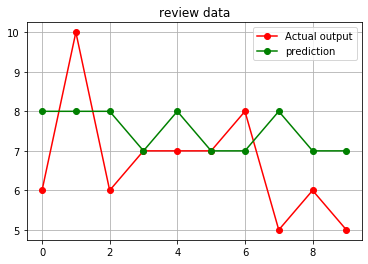

In [149]:
plt.plot(Y_test[:10].values, label='Actual output',color='red',marker='o')
plt.plot(pred2[:10], label='prediction',color='green',marker='o')
plt.title('review data')
plt.grid(True)
plt.legend()
plt.show()

In [150]:
cm2 = confusion_matrix(Y_test,pred2)
print(cm2)

[[ 0  0  0  2  0  6  1  4  0  0]
 [ 0  0  0  1  1  3  1  3  0  0]
 [ 0  0  1  4  4 10  3  2  0  1]
 [ 0  0  3  2  4 13  7 11  4  4]
 [ 0  1  2  3  4 18 19 19  7  3]
 [ 0  1  1 10 12 41 47 41 12 10]
 [ 0  1  1 10 12 37 60 51 14  7]
 [ 0  2  2  8 16 42 62 69 13 16]
 [ 0  3  0  2  3 11 23 29 10  5]
 [ 0  1  1  3  0  6  7 17  5  4]]


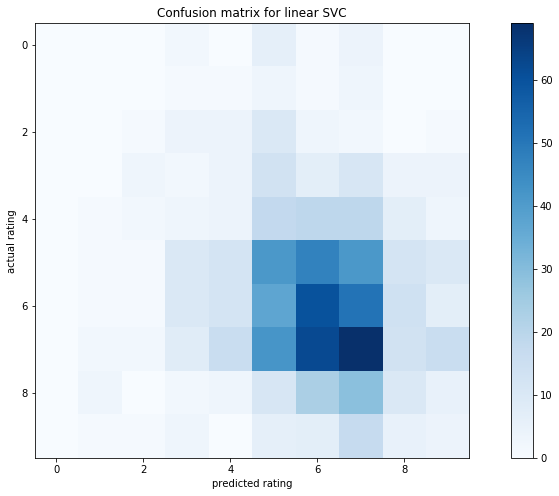

In [151]:
# import seaborn as sb
# print("Confusion matrix for linear SVC:\n")
# matrix = confusion_matrix(Y_test,pred2)
# fig= plt.figure(figsize=(15,6))
# ax = fig.add_axes([1,1,1,1])
# sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="RdPu")
# ax.set_xlabel('Actual rating')
# ax.set_ylabel('Predicted rating')

plt.figure(figsize=(15,8))
# ax = sb.heatmap(cm2, linewidth=0.5)
plt.imshow(cm2, cmap='Blues', interpolation='nearest')
plt.title("Confusion matrix for linear SVC")
plt.ylabel("actual rating")
plt.xlabel("predicted rating")
plt.colorbar()
plt.show()

In [152]:
cr2 = classification_report(Y_test, pred2)
print("Classification Report for Linear SVC")
print(cr2)

Classification Report for Linear SVC
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         9
         3.0       0.09      0.04      0.06        25
         4.0       0.04      0.04      0.04        48
         5.0       0.07      0.05      0.06        76
         6.0       0.22      0.23      0.23       175
         7.0       0.26      0.31      0.28       193
         8.0       0.28      0.30      0.29       230
         9.0       0.15      0.12      0.13        86
        10.0       0.08      0.09      0.09        44

    accuracy                           0.21       899
   macro avg       0.12      0.12      0.12       899
weighted avg       0.20      0.21      0.20       899



><b><h2>comaparison of all different classifier Accuracy using scatter plot</h2></b>


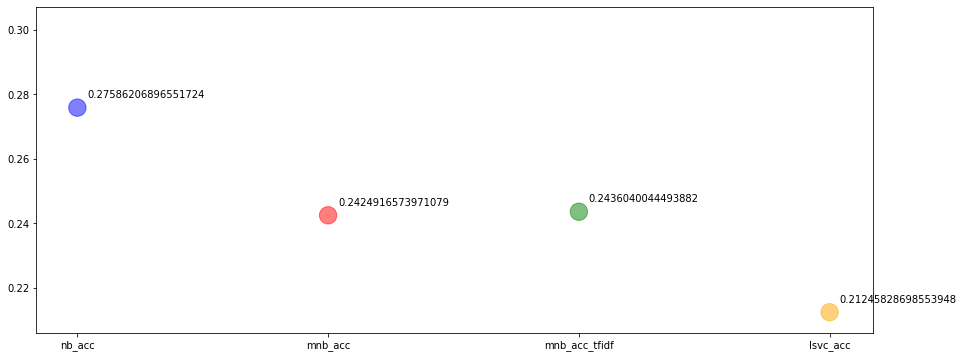

In [153]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

plt.figure(figsize=(15,6))
N = 4
x = ['nb_acc','mnb_acc','mnb_acc_tfidf', 'lsvc_acc']
y = [nb_acc,mnb_acc,mnb_acc_tfidf, lsvc_acc]
colors =['blue','red','green','orange']
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
for i in range(len(x)):
    plt.annotate(y[i], (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x[i], y[i], s=area, color=colors[i], alpha=0.5)
plt.show()

In [159]:
text=["bad worsen worst game"]
# ridge = joblib.load('model_ridge_class.sav')
vector = vectorizer.transform(text)
result = mnb.predict(vector)
print(result)

[2.]


><h2><b>Contribution</b></h2><br><br>
>1) First I want to comapre two different Naive Bayes approches which are Bernoulli NB and Multinomial NB respectively. And I found that the Bernoulli Naive Bayes give better Accuracy than Multinomial Naive Bayes.<br>
>As Second step I used the Multinomial with tf idf to improve the multinomial Naive Bayes classifier's accuracy. Which result you can see in the above chart.

>2) I want to compare two different classifiers like the Linear Support Vector Classifier with Naive Bayes classifier. As a result, I got the conclusion that Linear Supoort Vector Classifier is very slow compare to the Naive Bayes Classifier.<br>
>Other most important finding is that Naive Bayes gives the high accuracy than the Support Vector Classifier.

><h2><b>Challenges faced during the project</b></h2><br><br>
>1) As this data is too large that contains 15 millions of record. It is too hard to use all the data and get the accuracy of different classification models. Considering my device's processor capacity, I decide to the shuffle the whole data and take 10% portion of the data to complete this project.

>2) Second challenge I faced here is, it is hard to decide which classification is best only having the accuracy mesure. So, I decide to make the classification report for the every different classier which is helpful to decide the best clssifier for this game review dataset.

><h2><b>Best hyperparameter</b></h2><br>
> For my term project,I can conclude after using different classifier that Naive bayes gives the best result and accuracy than any other clssifier.

In [154]:
import joblib
# joblib.dump(model_ridge_class,'model_ridge_class.sav')
joblib.dump(mnb,'mnb.sav')
joblib.dump(nb,'nb.sav')
joblib.dump(lsvc,'lsvc.sav')
joblib.dump(mnbtf,'mnbtf.sav')
joblib.dump(vectorizer,'vectorizer.sav')
joblib.dump(tfidfvect,'tfidfvect.sav')

['tfidfvect.sav']

><h1><b>References</b></h1><br>



a.vectorization : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br>
b.bernoulliNB : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html<br>
c.accuracy score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html<br>
d.F1 score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html<br>
e.confusion matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
f. heatmap :https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html<br>
g. classification report : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>
h. muntinomial Naive Bayes : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
i. linear svc : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html<br>
j. stop words removal : https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe<br>
k. grid search :https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html